<a href="https://colab.research.google.com/github/Mariolh33/G2_100472188_100429058_P2/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Comparación de KMeans e implementación propia
https://github.com/Mariolh33/G2_100472188_100429058/blob/main/Practica2.ipynb

Mario Lafuente Hueso - 100472188

Pablo Martín Muñoz   - 100429058

Importamos el archivo stars2.csv del repositorio de github

In [12]:
import pandas as pd

# URL del archivo CSV en GitHub
url = 'https://github.com/Mariolh33/G2_100472188_100429058_P2/raw/main/Stars2.csv'

# Cargar el archivo directamente con pandas
stars2 = pd.read_csv(url, encoding='utf-8')

# Explorar el DataFrame
print("Número de instancias y atributos de la tabla original: ", stars2.shape)
stars2


Número de instancias y atributos de la tabla original:  (240, 6)


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


In [11]:
import numpy as np
from sklearn.datasets import make_blobs

# Genera datos sintéticos
X, y = make_blobs(
    n_samples= 240,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    random_state=8858
)

print("Primeros 2 registros de X:")
print(X[:5])
print("Primeros 2 registros de y:")
print(y[:5])

Primeros cinco registros de X:
[[-0.12599552 -4.04779288]
 [-4.62684854 -3.94268412]
 [-7.75450411  8.44499733]
 [-4.90518232 -4.62301968]
 [ 0.80373109 -3.49845883]]
Primeros cinco registros de y:
[0 2 1 2 0]


In [10]:
inertias

[2806.1366495117873,
 2025.8776717878634,
 nan,
 nan,
 nan,
 1152.9920099929977,
 1147.0824056034212,
 230.66294981333056,
 224.30645314711913,
 219.73188390855185,
 217.7481157547173,
 216.05788993228109,
 211.86772939930057,
 207.60588684480499]

<ipython-input-9-3a45ddbc7ea6>:25: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])


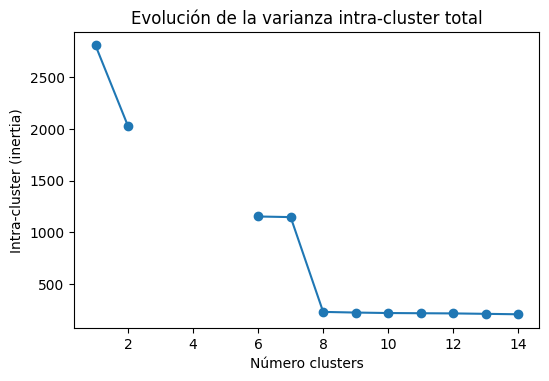

In [9]:
import numpy as np

class KMeans1:
    def __init__(self, n_clusters, n_init=10, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Inicialización de los centroides de manera aleatoria
        centroids_indices = np.random.choice(n_samples, size=self.n_clusters, replace=False)
        self.centroids = X[centroids_indices]

        # Bucle principal del algoritmo KMeans
        for _ in range(self.max_iter):
            # Asignar cada muestra al centroide más cercano
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

            # Actualizar los centroides como la media de las muestras asignadas a cada cluster
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Comprobar si la convergencia ha sido alcanzada (si los centroides han cambiado menos que la tolerancia)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        # Calcular la inercia
        self.inertia_ = sum(np.min(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1))

        return self

# Implementación del método elbow para encontrar el número óptimo de clusters
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans1(
        n_clusters=n_clusters,
        n_init=20,
        random_state=8858
    )
    modelo_kmeans.fit(X)
    inertias.append(modelo_kmeans.inertia_)

# Visualización del método elbow
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')

plt.show()


In [4]:

def pca(X, n_components):
    # Centramos los datos
    X_centered = X - np.mean(X, axis=0)

    # Calculamos la matriz de covarianza
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Calculamos los autovalores y autovectores de la matriz de covarianza
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Ordenamos los autovalores y autovectores en orden descendente
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Seleccionamos los primeros n_componentes autovectores
    principal_components = sorted_eigenvectors[:, :n_components]

    # Proyectamos los datos originales en el nuevo espacio de características
    X_pca = np.dot(X_centered, principal_components)

    return X_pca, principal_components

# Seleccionamos solo los atributos numéricos para PCA
X_numeric = stars2[['Temperature', 'L', 'R', 'A_M']].values

# Número de componentes principales deseado
n_components = 2

# Aplicamos PCA a los atributos numéricos
X_pca, principal_components = pca(X_numeric, n_components)

# Visualizamos la proyección resultante
print("Proyección PCA de los datos:")
print(X_pca)

Proyección PCA de los datos:
[[ 1.07320921e+05  5.17712147e+03]
 [ 1.07321469e+05  5.20311455e+03]
 [ 1.07330746e+05  5.64499848e+03]
 [ 1.07326548e+05  5.44505110e+03]
 [ 1.07344620e+05  6.30582528e+03]
 [ 1.07325708e+05  5.40506121e+03]
 [ 1.07329969e+05  5.60800814e+03]
 [ 1.07330746e+05  5.64499817e+03]
 [ 1.07329696e+05  5.59501144e+03]
 [ 1.07328647e+05  5.54502447e+03]
 [ 1.07309753e+05  4.64526318e+03]
 [ 1.07319630e+05  5.11613875e+03]
 [ 1.07319538e+05  5.11113843e+03]
 [ 1.07309163e+05  4.61726946e+03]
 [ 1.07329696e+05  5.59501063e+03]
 [ 1.07315210e+05  4.90519294e+03]
 [ 1.07326568e+05  5.44605052e+03]
 [ 1.07307822e+05  4.55328699e+03]
 [ 1.07318317e+05  5.05315378e+03]
 [ 1.07313055e+05  4.80422084e+03]
 [ 1.06860532e+05 -1.67491244e+04]
 [ 1.07222861e+05  5.06345629e+02]
 [ 1.07233776e+05  1.02620919e+03]
 [ 1.07206910e+05 -2.53454856e+02]
 [ 1.07038983e+05 -8.25135565e+03]
 [ 1.07112668e+05 -4.74227701e+03]
 [ 1.07205440e+05 -3.23436540e+02]
 [ 1.07223701e+05  5.46335